In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split

from sklearn.tree import  DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(714, 3)

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [10]:
clf=DecisionTreeClassifier()

In [11]:
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)

In [13]:
accuracy_score(Y_test,y_pred)

0.6223776223776224

In [14]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy'))

0.6261150234741784

In [36]:
kbin_age=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [37]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [38]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [39]:
trf.named_transformers_['first'].n_bins_

array([10])

In [40]:
clf.fit(X_train_trf,Y_train)
y_pred2=clf.predict(X_test_trf)

accuracy_score(Y_test,y_pred2)

0.6993006993006993

In [41]:
X_trf=trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,Y,cv=10,scoring='accuracy'))

0.682140062597809

In [47]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='green')
    plt.title("Fare")

    plt.show()
    

0.6275039123630674


/Users/debodityamajumder/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Users/debodityamajumder/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


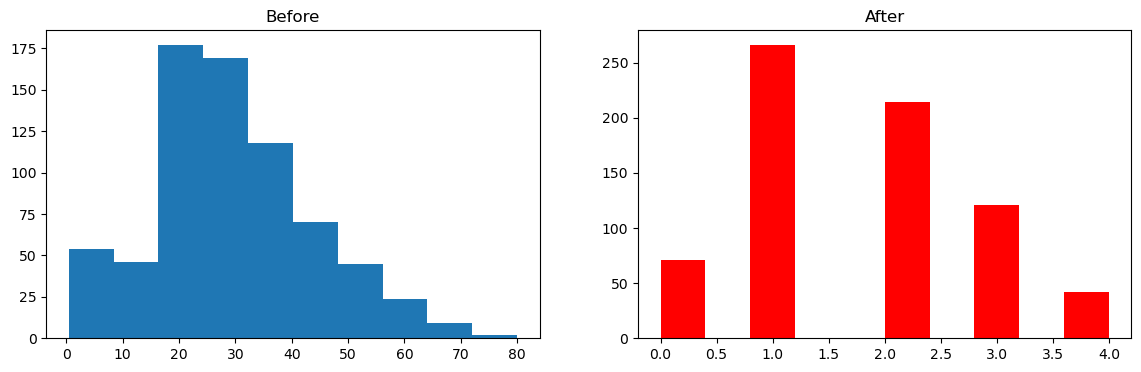

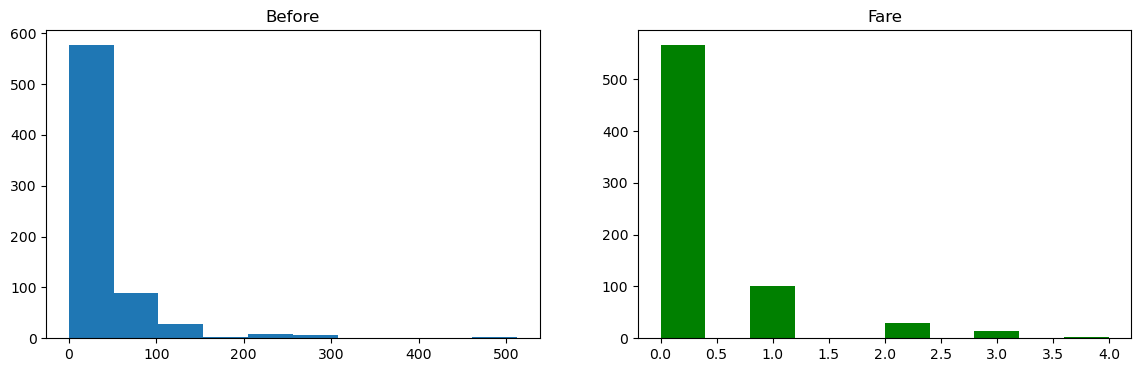

In [51]:
discretize(5,'kmeans')